In [209]:
#importing libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder, StandardScaler,LabelEncoder
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from scipy.stats import zscore
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,LogisticRegression

In [210]:
#calling the file
tem=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')

In [211]:
tem

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


This is the data of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea.
This data consists of summer data from 2013 to 2017.
There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data.

In [212]:
tem.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


This shows the first five rows and columns of the given dataset.

In [213]:
tem.shape

(7752, 25)

This data contain 7752 rows and 25 columns.

In [214]:
tem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


This shows the dtype that is float64 and we can see the present of null values.

In [215]:
tem.columns.tolist()

['station',
 'Date',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar radiation',
 'Next_Tmax',
 'Next_Tmin']

Name of all the columns.

In [216]:
tem.nunique().to_frame('No of unique values')

,No of unique values
station,25
Date,310
Present_Tmax,167
Present_Tmin,155
LDAPS_RHmin,7672
LDAPS_RHmax,7664
LDAPS_Tmax_lapse,7675
LDAPS_Tmin_lapse,7675
LDAPS_WS,7675
LDAPS_LH,7675


This are the unique values of all the columns.

In [217]:
tem.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

This are the missing value count present in all the columns.

<Axes: >

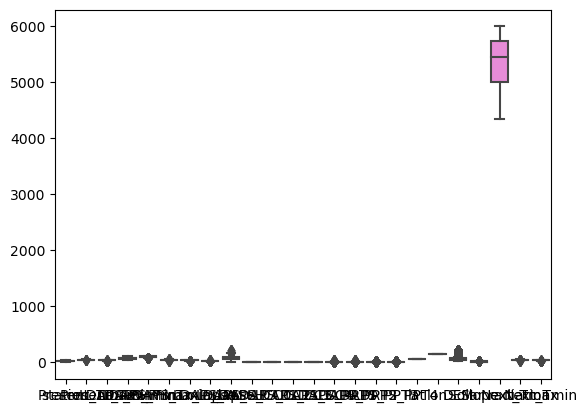

In [218]:
#dropping of duplicates values
tem.drop_duplicates(inplace=True)
sns.boxplot(tem)

In [219]:
tem.duplicated().sum()

0

We can see that there are no dublicate values.

In [220]:
tem.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


#This shows the statistical information of the numericalcolumns.
It has no negative values from the above abservation we can say that-

There are missing values in the data as we can see the column count are not same. 
The median(50%) value is as same as the mean , which means data is normal. 
There is huge difference between the max and 75% so there are outliers present in the data. 
The standard deviation,25% percentile value and min can be notice by this describe method.

In [221]:
#dropping the null values 
tem=tem.dropna()

In [222]:
tem

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,30-08-2017,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,30-08-2017,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


After dropping the null values the total rows are 7588 and 25 columns, before it was 7752 rows and 25 columns.
we can see that 164 rows has been dropped.

<Axes: >

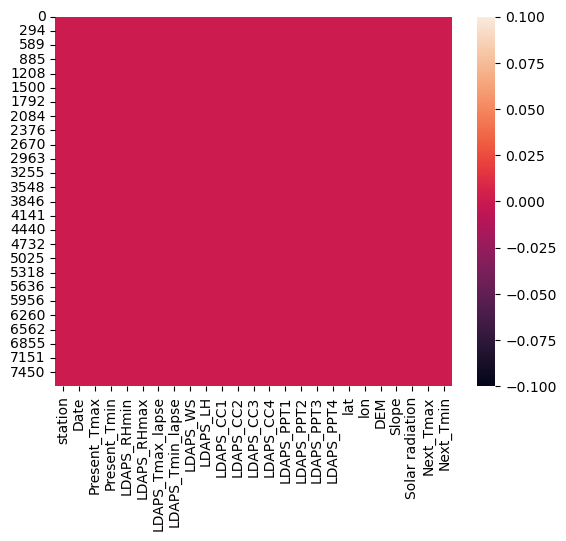

In [223]:
sns.heatmap(tem.isnull())

Visualization of null values through heat map after dropping the null values.

In [224]:
#checking the correlation
tem.corr

<bound method DataFrame.corr of       station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7745     21.0  30-08-2017          23.1          17.8    24.688997   
7746     22.0  30-08-2017          22.5          17.4    30.094858   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.0

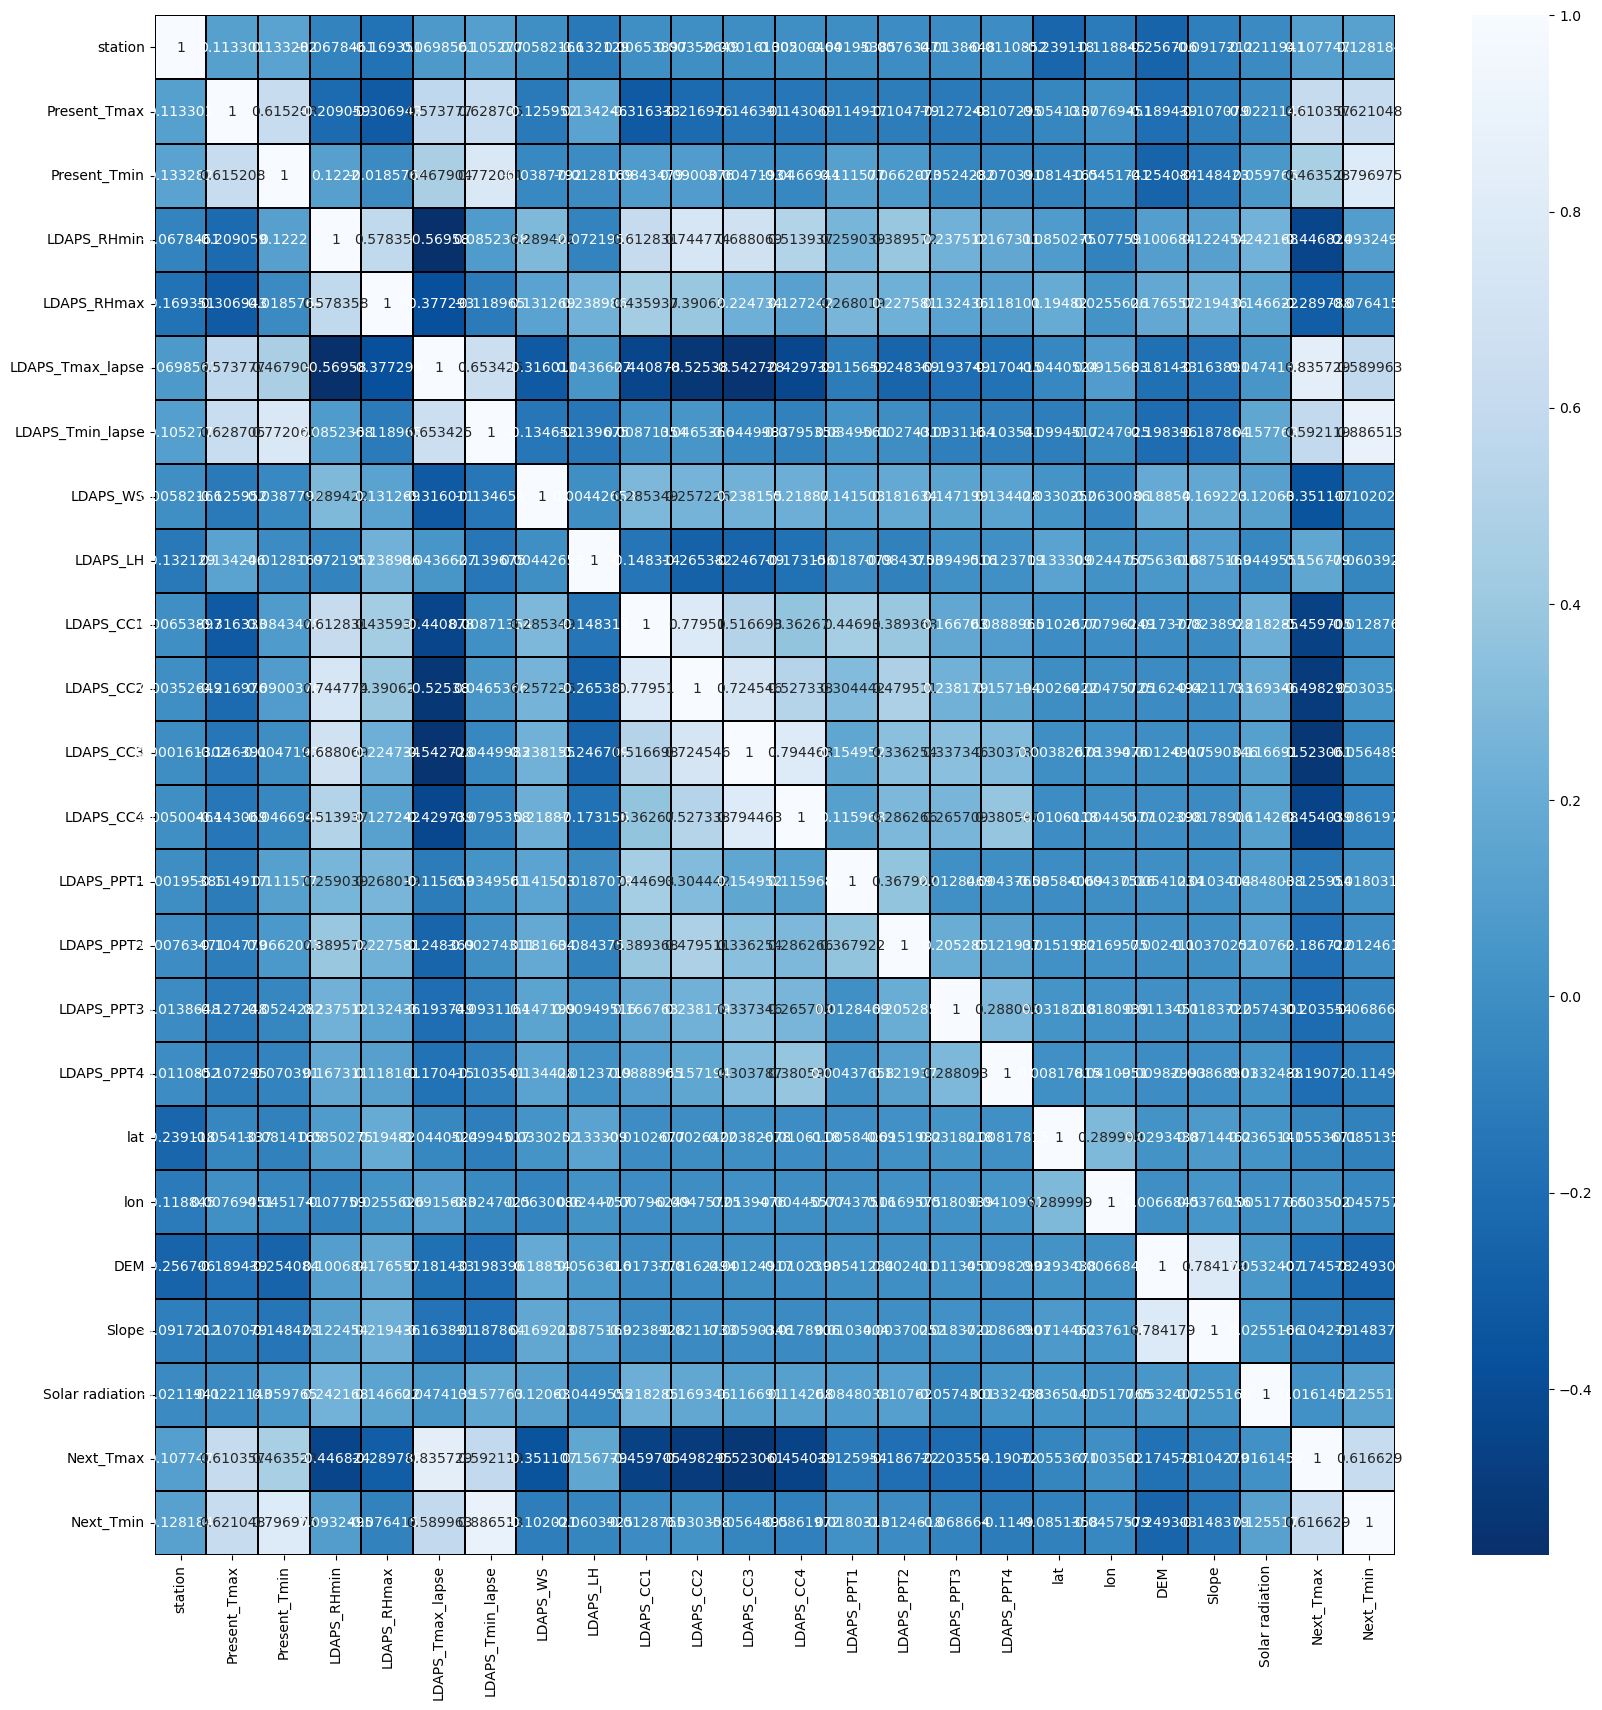

In [225]:
plt.figure(figsize=(20,20))
sns.heatmap(tem.corr(),linewidths=0.1,fmt='1g',linecolor='black',annot=True,cmap='Blues_r')
plt.yticks(rotation=0);
plt.show()

LDAPS_CC1,CC2,CC3,CC4 are negatively correlated with next_tmax and LDPAS_Tmax_lapse.
next_tmax,next_tmin are positively correlated with LDPAS_tmax_lapse and pLDPAS_tmin lapse.
Lets drop the unnecessary column date.

In [226]:
#dropping the column date
tem.drop('Date',axis=1,inplace=True)

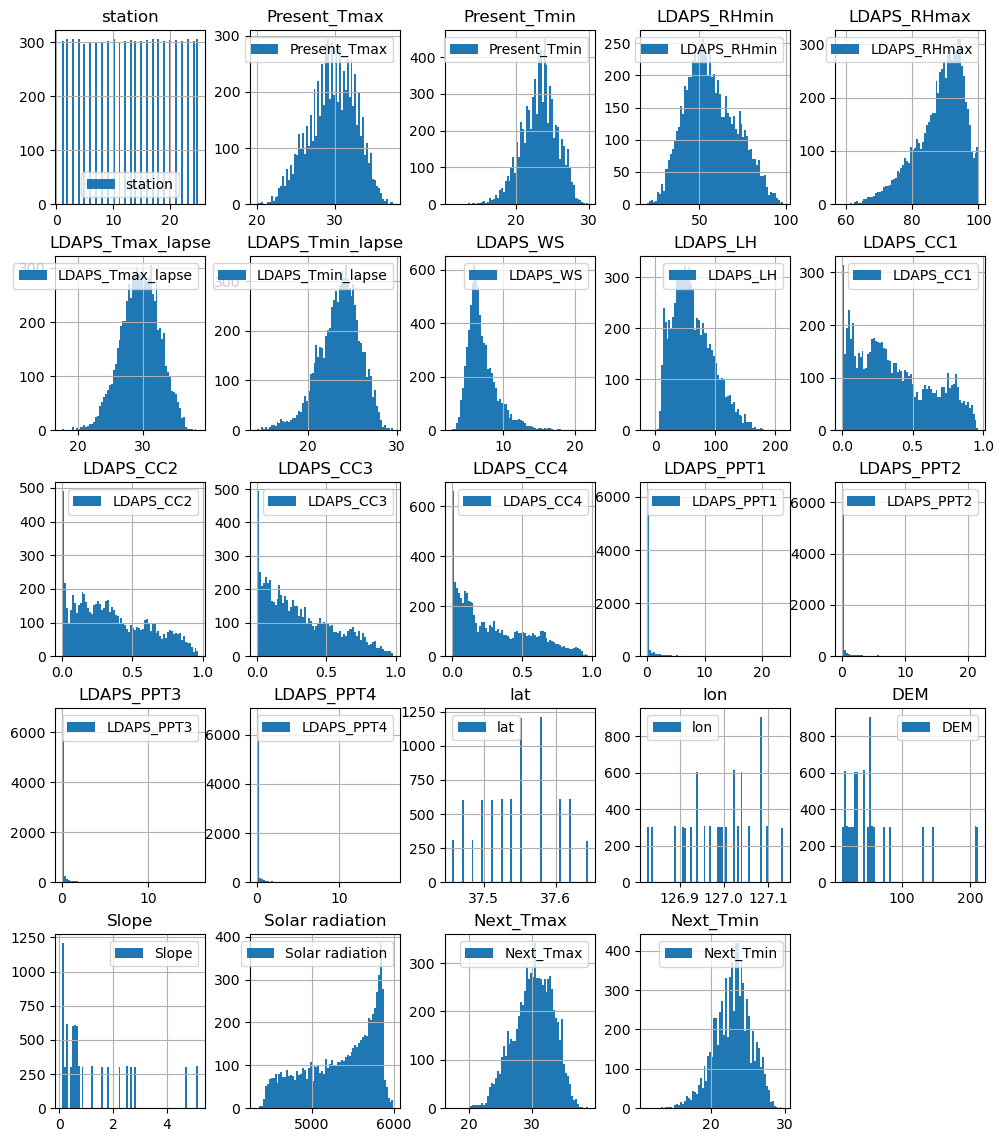

In [227]:
#plotting histogram for all columns
tem.hist(bins=70, figsize=(12,14),legend=True)
plt.show()

LDAPS_RHmax, Solar radiation are skewed to the left, LDAPS_WS, LH, CC1, CC2, CC3, CC4 are skwed to the right
and rest has normal distribution of data.

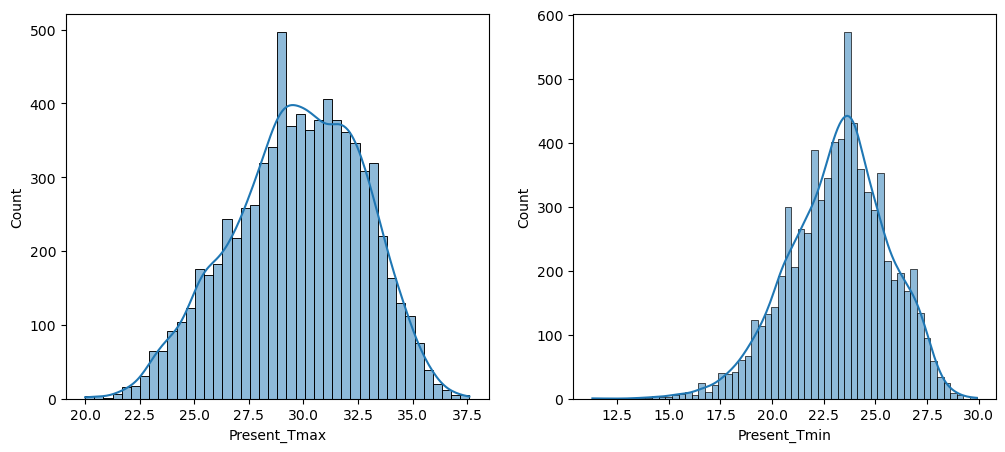

In [228]:
#plotting histogram for present tmax and tmin
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(tem['Present_Tmax'],kde=True)
plt.subplot(1,2,2)
sns.histplot(tem['Present_Tmin'],kde=True)
plt.show()

For majority of reading of Present Tmax varies in between 28 to 33.5 degree.
For majority of reading of Present Tmin varies in between 22.5 to 26 degree.

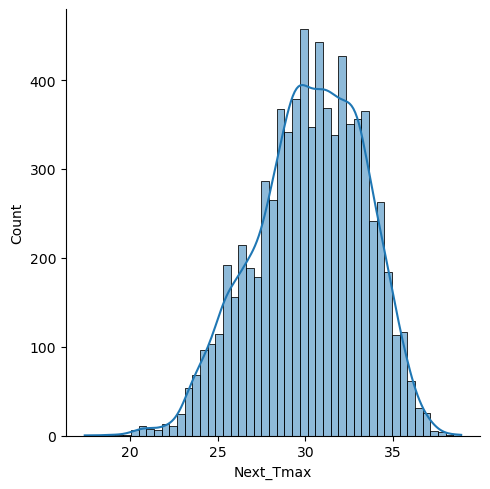

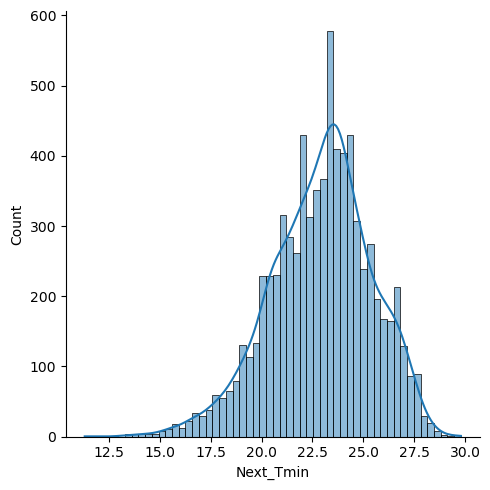

In [229]:
sns.displot(tem['Next_Tmax'],kde=True)
sns.displot(tem['Next_Tmin'],kde=True)

next temperature max reading is high from between 28 to 34.5 and next temperature min reading is high between 22.0 to 25.0.

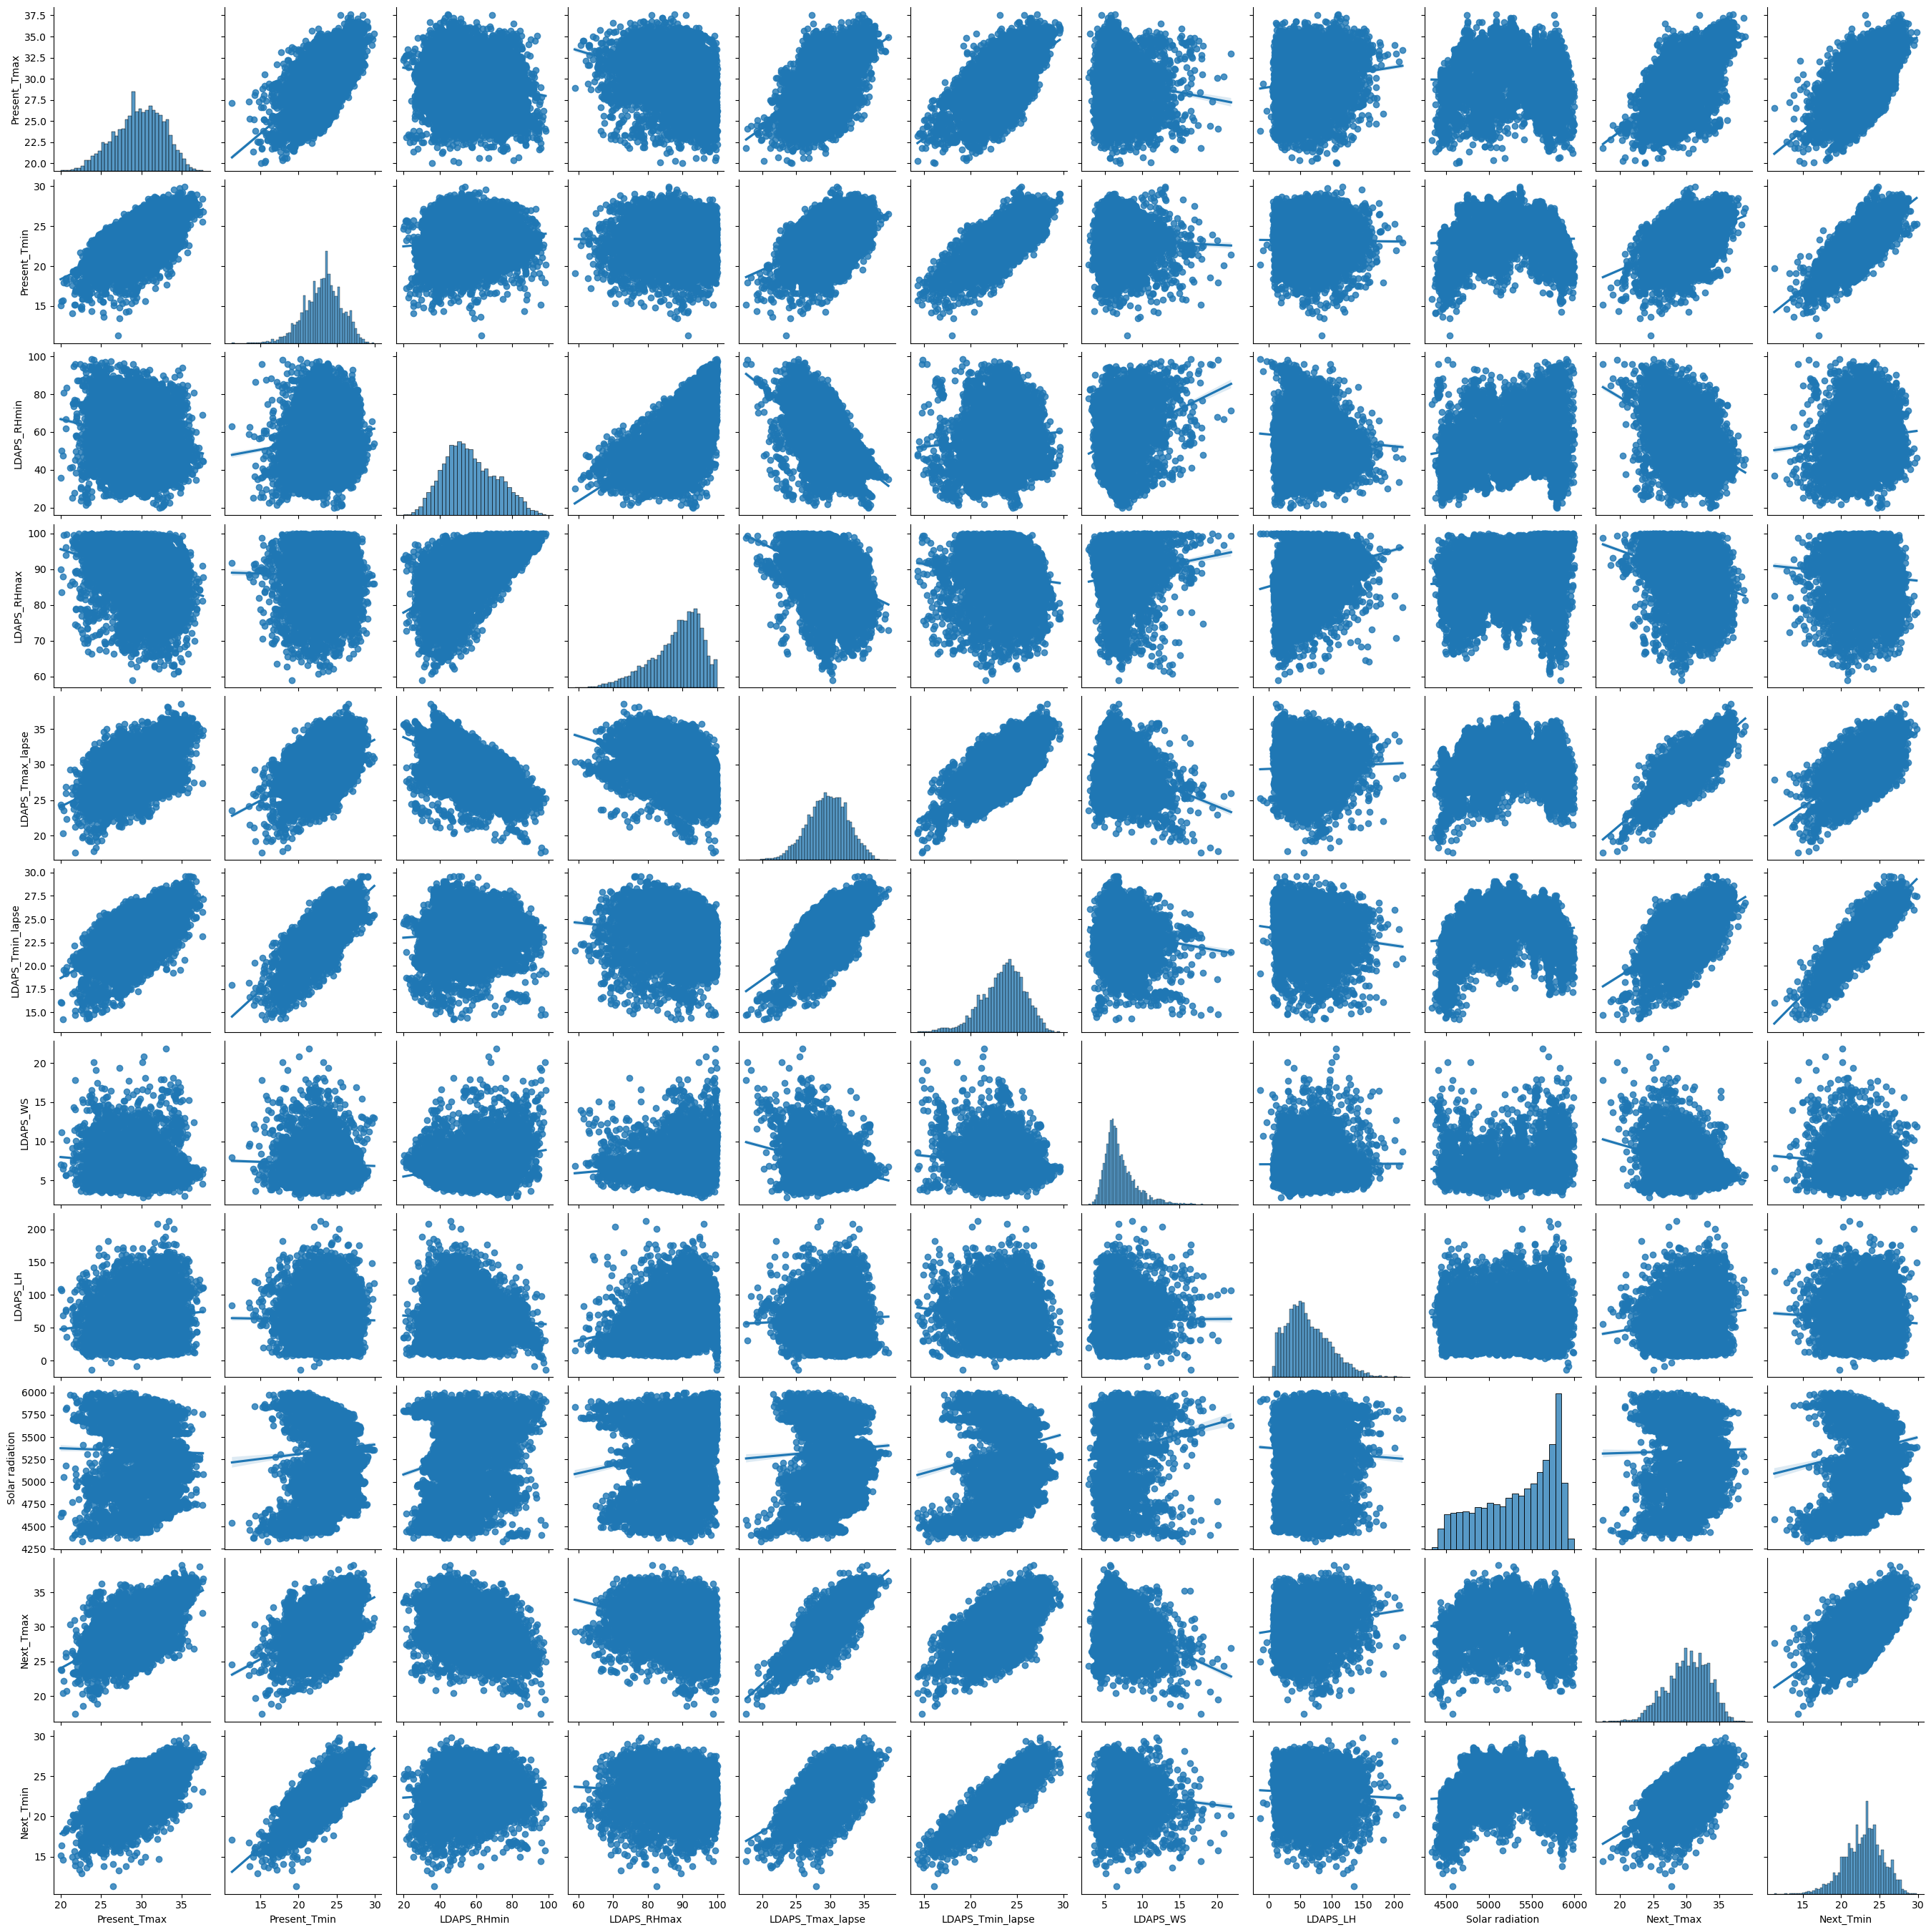

In [230]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
sns.pairplot(tem[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','Solar radiation','Next_Tmax','Next_Tmin']], kind='reg')

we can see the cluster of data and strong correlation of columns with each other in the index.

In [231]:
#checking maximun and minimum temperature of next day
tem.loc[tem.Present_Tmax==tem.Present_Tmax.max()]

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
5717,18.0,37.6,26.8,44.254253,87.745514,34.794021,27.150764,6.366598,111.225118,0.218892,...,0.0,0.0,0.0,37.4832,127.024,56.4448,1.2313,5082.563477,37.0,27.8


In [232]:
tem.loc[tem.Present_Tmax==tem.Present_Tmax.min()]

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7725,1.0,20.0,15.1,35.652172,89.97319,24.323737,16.128899,7.087329,108.981108,0.046182,...,0.0,0.0,0.0,37.6046,126.991,212.335,2.785,4614.76123,23.8,15.1


In [233]:
tem.loc[tem.Present_Tmin==tem.Present_Tmin.max()]

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
2397,23.0,35.3,29.9,53.946949,85.985161,30.912804,25.439537,13.011129,117.837212,0.684685,...,0.005681,0.248885,0.003176,37.5372,126.891,15.5876,0.1554,5360.226563,31.3,24.8


In [234]:
tem.loc[tem.Present_Tmin==tem.Present_Tmin.min()]

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
6116,17.0,27.1,11.3,62.793823,91.726936,23.529546,17.963487,7.984566,84.48145,0.668264,...,0.0,0.405181,1.015573,37.6181,127.099,53.4712,0.697,4539.616699,24.6,17.1


The maximum present day temperature is 37.6 at the station no 18 on the day 11.08.2016 and minimum temperature of Present_Tmax is at station no 1 on the day 30.08.2017.
The mainimum present_tmin is 11.3 at the station no 17 on the day 27.08.2016 and maximum Present_Tmin is 29.9 at 23 station on 02.08.2014

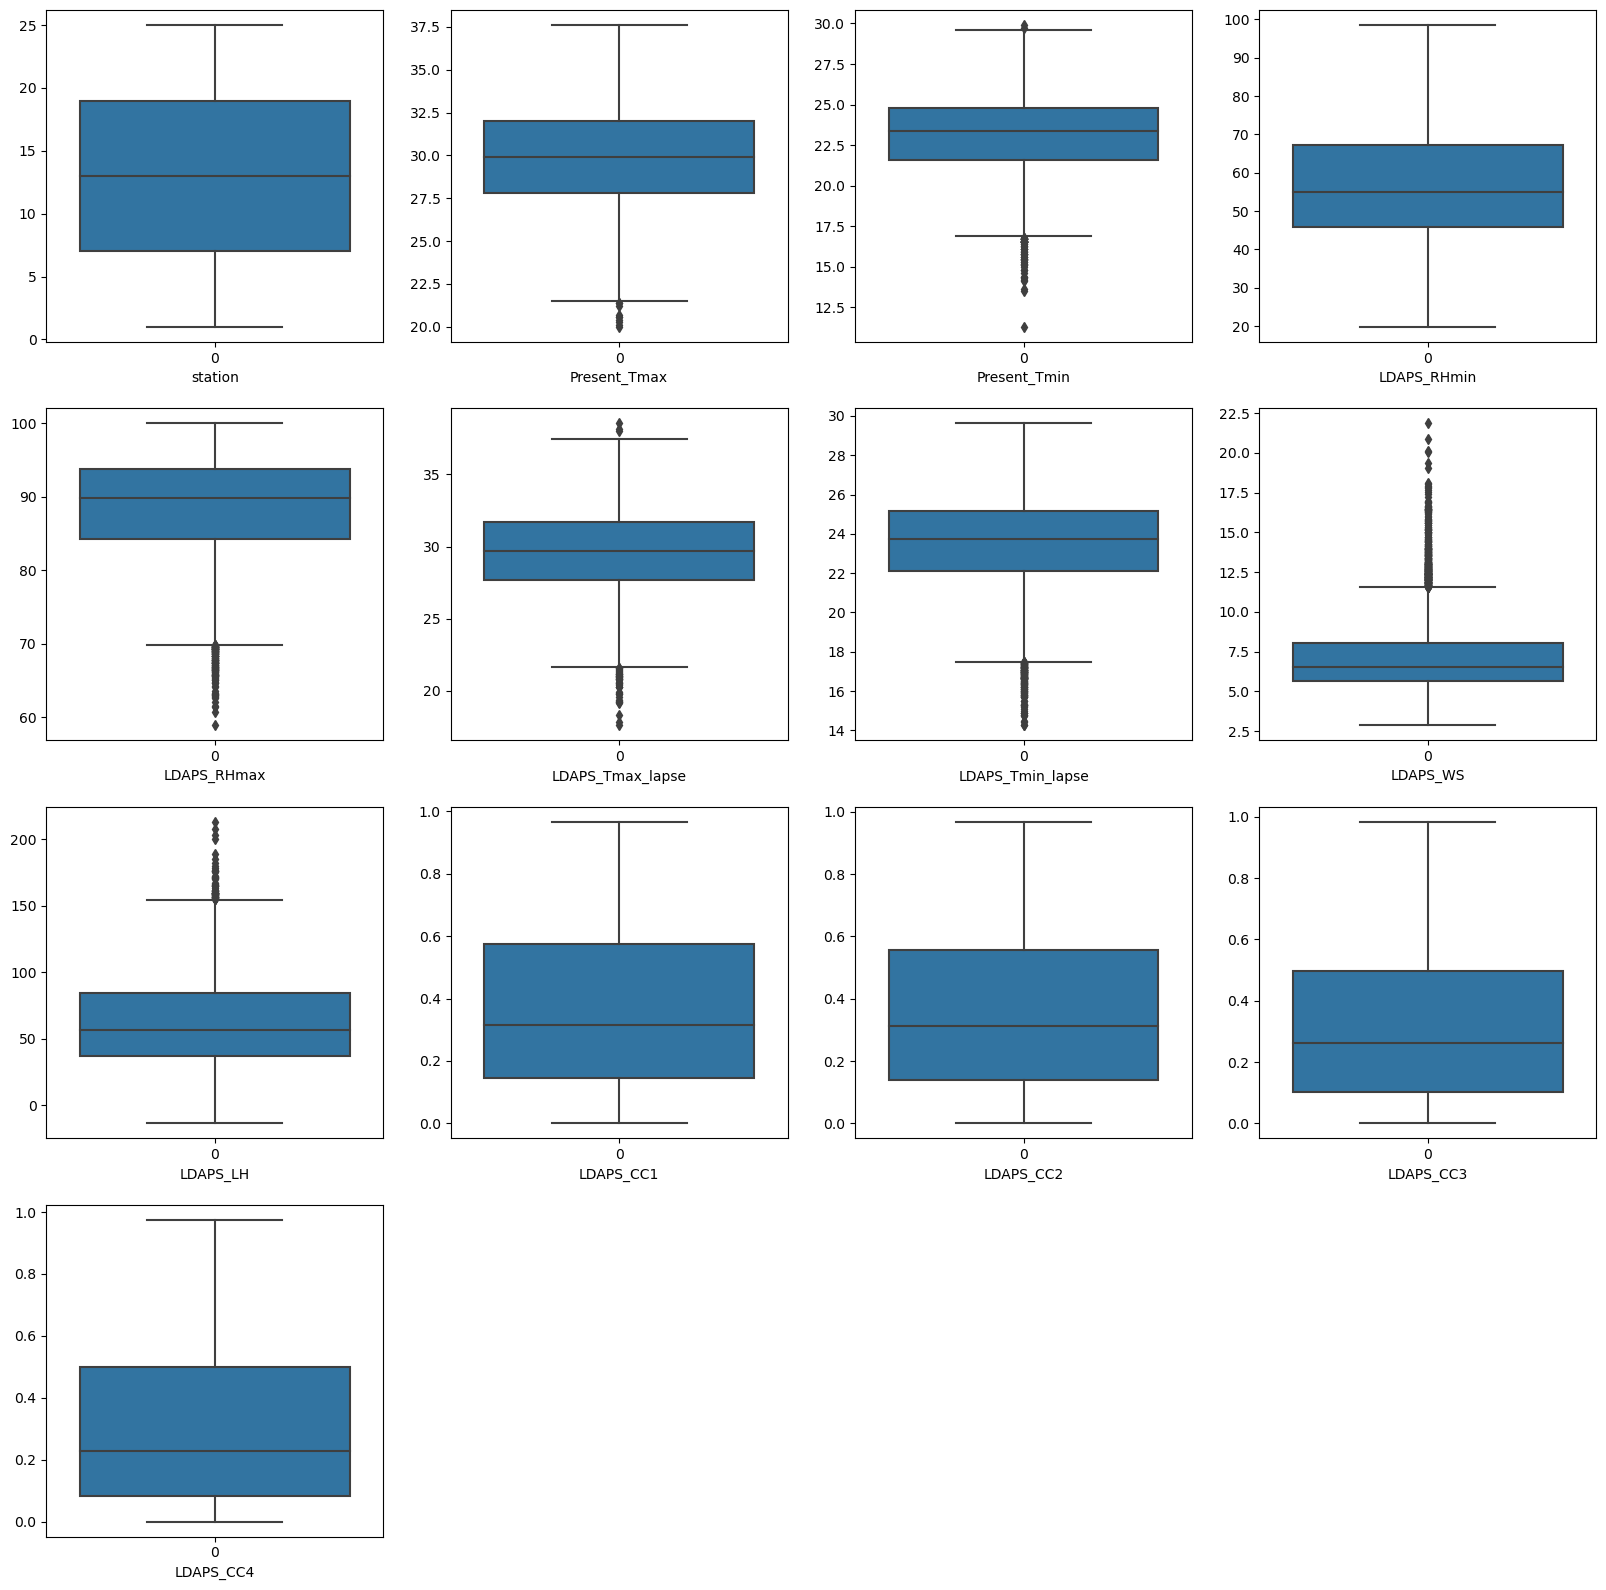

In [235]:
plt.figure(figsize=(20,25))
p=1
for i in tem:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(tem[i])
        plt.xlabel(i)
        p+=1
plt.show()  

We can see the presence of outlier in the dataset.
column with ouliers are Present_tmax,Present_tmin,LDAPS_RHmax, LDPAS_Tmax_lapse,LDAPS_Tmin-lapse,LDAPS_WS and LDAPS_LH

In [297]:
#removing outliers
out=tem[['LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','Present_Tmax','Present_Tmin','LDAPS_RHmax']]
z=np.abs(zscore(out))
z

,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,Present_Tmax,Present_Tmin,LDAPS_RHmax
0,0.525269,0.215525,0.126423,0.206603,0.353318,0.748029,0.382768
1,0.078334,0.223368,0.644133,0.313359,0.725138,0.664721,0.311697
2,0.160080,0.449896,0.439100,1.244497,0.624033,0.043400,0.609425
3,0.028710,0.079238,0.663353,0.096026,0.758840,0.085054,1.128335
4,0.171981,0.010803,0.624327,1.349989,0.556630,0.539758,0.249244
...,...,...,...,...,...,...,...
7745,0.614083,2.223667,0.225479,1.569844,2.240616,2.247578,1.402898
7746,0.990460,2.432415,0.609132,0.583486,2.442826,2.414195,0.648815
7747,1.110333,2.021883,0.434188,0.283984,2.173212,2.539157,1.318376
7748,0.886737,2.039881,0.253241,0.452772,2.173212,2.289232,1.537141


In [298]:
np.where(z>3)
tem=tem[(z<3).all(axis=1)]
tem.shape

(7328, 24)

In [299]:
#checking skewness
tem.skew()

station             0.000200
Present_Tmax       -0.221054
Present_Tmin       -0.211691
LDAPS_RHmin         0.282435
LDAPS_RHmax        -0.750789
LDAPS_Tmax_lapse   -0.096445
LDAPS_Tmin_lapse   -0.375972
LDAPS_WS            1.017383
LDAPS_LH            0.592215
LDAPS_CC1           0.479026
LDAPS_CC2           0.470458
LDAPS_CC3           0.637346
LDAPS_CC4           0.670804
LDAPS_PPT1          5.258862
LDAPS_PPT2          5.725304
LDAPS_PPT3          6.682187
LDAPS_PPT4          6.738968
lat                 0.103182
lon                -0.289917
DEM                 1.773696
Slope               1.597068
Solar radiation    -0.514832
Next_Tmax          -0.266139
Next_Tmin          -0.267519
dtype: float64

In [300]:
#distributing the data
x=tem.iloc[:,0:-1]

In [301]:
y=tem.iloc[:,-1]

In [302]:
x=tem.drop('Next_Tmax',axis=1)
y=tem['Next_Tmax']
print('feature dimension',x.shape)
print('label dimension',y.shape)

feature dimension (7328, 23)
label dimension (7328,)


# Model Building

In [303]:
#scaling of data
st=StandardScaler()
x=st.fit_transform(x)
x

array([[-1.66961239, -0.3781095 , -0.81723334, ...,  1.14532298,
         1.52630835, -0.76943234],
       [-1.53086302,  0.72493801, -0.73063094, ..., -0.53483366,
         1.23362576, -0.22039932],
       [-1.39211365,  0.62152731,  0.00548947, ..., -0.71831987,
         1.21999185,  0.37086701],
       ...,
       [ 1.38287379, -2.23950218, -2.67918497, ..., -0.80022279,
        -2.1435642 , -2.07866493],
       [ 1.52162316, -2.23950218, -2.41937777, ..., -0.75072591,
        -2.15526461, -1.78303176],
       [ 1.66037253, -2.27397241, -2.54928137, ..., -0.71447258,
        -2.1245438 , -2.37429809]])

In [304]:
from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics
from sklearn.linear_model import Ridge, Lasso

In [305]:
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pre=lr.predict(x_test)
    acc=r2_score(y_test,pre)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best accuracy',maxAccu,'at random state',maxRs)        
    

Best accuracy 0.8076930871803454 at random state 191


In [306]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRs)

In [307]:
#support vector regression
svr=SVR()
svr.fit(x_train,y_train)
pre=svr.predict(x_test)
pred=svr.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.879067883890337
86.48477188252517
Mean absolute error: 0.833240289324818
Mean square error: 1.3252524290226586
Root mean square error: 1.1511960862610064


In [308]:
#Randomforest
ra=RandomForestRegressor()
ra.fit(x_train,y_train)
pre=ra.predict(x_test)
pred=ra.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.9843586248998062
91.05030683673873
Mean absolute error: 0.7035748067303319
Mean square error: 0.877573245566166
Root mean square error: 0.9367887945349079


In [309]:
#KNN
knn=KNN()
knn.fit(x_train,y_train)
pre=knn.predict(x_test)
pred=knn.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.8881576188562944
85.07457470444353
Mean absolute error: 0.9012278308321966
Mean square error: 1.463531059572533
Root mean square error: 1.209764877805821


In [310]:
#Linear regression
lr=LinearRegression()
lr.fit(x_train,y_train)
pre=lr.predict(x_test)
pred=lr.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.7737186911968523
80.76930871803454
Mean absolute error: 1.0539521493233808
Mean square error: 1.8856892470987967
Root mean square error: 1.3732040078221432


In [311]:
#Extratrees regressor
ex=ExtraTreesRegressor()
ex.fit(x_train,y_train)
pre=ex.predict(x_test)
pred=ex.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

1.0
92.84096335516688
Mean absolute error: 0.6302296498408365
Mean square error: 0.701988203274215
Root mean square error: 0.837847362754228


In [312]:
#Lasso
las=Lasso()
las.fit(x_train,y_train)
pre=las.predict(x_test)
pred=las.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.5468505277039457
55.644707798553284
Mean absolute error: 1.6722629174324595
Mean square error: 4.349313102157228
Root mean square error: 2.0855006838064636


# CROSS VALIDATION 

In [313]:
# Cv score for support vector
score= cross_val_score(svr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.70403339 0.5959694  0.66808523 0.77439828 0.69446575]
0.6873904103373276
difference between R2score and cross validation -13.094333235179478


cross validation scoreof svr is 0.6873904103373276

In [314]:
# Cv score for Random forest
score= cross_val_score(ra,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.7298612  0.65495164 0.65558631 0.77721173 0.64867972]
0.6932581173946655
difference between R2score and cross validation -13.681103940913264


cross validation score of random forest is 0.6932581173946655

In [315]:
# Cv score for KNN
score= cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.62637572 0.50067776 0.51586925 0.64782696 0.61435284]
0.5810205068293705
difference between R2score and cross validation -2.457342884383762


cross validation of KNN is 0.5810205068293705

In [316]:
# Cv score for Linear regression
score= cross_val_score(lr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.70737123 0.69010326 0.70805246 0.80026245 0.69410747]
0.7199793742692085
difference between R2score and cross validation -16.353229628367572


cross validation of linear regression is 0.7199793742692085

In [317]:
# Cv score for Extatrees regressor
score= cross_val_score(ex,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.71803988 0.65565049 0.67150439 0.79412834 0.67902995]
0.7036706099484096
difference between R2score and cross validation -14.722353196287674


cross validation score of extratrees is 0.7036706099484096

In [318]:
# Cv score for lasso
score= cross_val_score(las,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.5042991  0.50530791 0.55828247 0.47060546 0.559586  ]
0.5196161858571149
difference between R2score and cross validation 3.6830892128417947


cross validation score of lasso is 0.5196161858571149

Linear regression is our best model as the difference between R2 score and cross validation score is least

# Setting Paramaters

In [319]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [320]:
para={'fit_intercept':[True],
      'copy_X':['bool',True],
     'n_jobs':['int',None]}
lr_cv=GridSearchCV(lr,para,cv=5)
lr_cv.fit(x_train,y_train)
print(lr_cv.best_params_)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None}


In [321]:
lr_new=LinearRegression(fit_intercept=True,copy_X=True,n_jobs=None)
lr_new.fit(x_train,y_train)
y_pred_new=lr_new.predict(x_test)
print(metrics.r2_score(y_test,y_pred_new))

0.8076930871803454


In [322]:
lr_new.fit(x_train,y_train)
pre=lr_new.predict(x_test)
print('R2 score:',r2_score(y_test,pre))
print('mean absolute error:',mean_absolute_error(y_test,pre))
print('mean square error;',mean_squared_error(y_test,pre))
print('root mean squre error:',np.sqrt(mean_squared_error(y_test,pre)))

R2 score: 0.8076930871803454
mean absolute error: 1.0539521493233808
mean square error; 1.8856892470987967
root mean squre error: 1.3732040078221432


In [323]:
import joblib
import pickle
filename="Next_Tmax.pkl"
pickle.dump(lr_new,open(filename,'wb'))

In [324]:
load_m=pickle.load(open('Next_Tmax.pkl','rb'))

In [325]:
result=load_m.score(x_test,y_test)
print(result*100)

80.76930871803454


In [326]:
con=pd.DataFrame([load_m.predict(x_test)[:],y_test[:]],index=['predicted','orginal'])
con

,0,1,2,3,4,5,6,7,8,9,...,2189,2190,2191,2192,2193,2194,2195,2196,2197,2198
predicted,33.927635,32.216588,35.330558,26.624003,30.82721,31.240487,32.046099,32.235414,32.441178,29.968937,...,30.724677,35.794397,28.191331,25.415776,28.625482,32.186549,31.201298,31.742395,30.123885,30.570812
orginal,34.600000,31.500000,33.900000,28.800000,29.50000,30.000000,32.200000,30.900000,31.900000,31.100000,...,30.000000,34.400000,27.700000,25.500000,28.700000,33.700000,31.800000,32.000000,29.900000,30.000000


# building model for Next_Tmin

In [327]:
x=tem.drop('Next_Tmin',axis=1)
y=tem['Next_Tmin']
print('feature dimension',x.shape)
print('label dimension',y.shape)

feature dimension (7328, 23)
label dimension (7328,)


In [328]:
#scaling of data
st=StandardScaler()
x=st.fit_transform(x)
x

array([[-1.66961239, -0.3781095 , -0.81723334, ...,  1.14532298,
         1.52630835, -0.42287088],
       [-1.53086302,  0.72493801, -0.73063094, ..., -0.53483366,
         1.23362576,  0.04270868],
       [-1.39211365,  0.62152731,  0.00548947, ..., -0.71831987,
         1.21999185,  0.24224278],
       ...,
       [ 1.38287379, -2.23950218, -2.67918497, ..., -0.80022279,
        -2.1435642 , -0.68891634],
       [ 1.52162316, -2.23950218, -2.41937777, ..., -0.75072591,
        -2.15526461, -0.58914929],
       [ 1.66037253, -2.27397241, -2.54928137, ..., -0.71447258,
        -2.1245438 , -0.85519476]])

In [349]:
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pre=lr.predict(x_test)
    acc=r2_score(y_test,pre)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best accuracy',maxAccu,'at random state',maxRs)        
    

Best accuracy 0.8495801895905712 at random state 10


In [350]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRs)

In [331]:
#support vector regression
svr=SVR()
svr.fit(x_train,y_train)
pre=svr.predict(x_test)
pred=svr.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*50)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.9204252253381646
45.4886534802203
Mean absolute error: 0.5445821383985675
Mean square error: 0.538226811725933
Root mean square error: 0.7336394289608029


In [332]:
#Randomforest
ra=RandomForestRegressor()
ra.fit(x_train,y_train)
pre=ra.predict(x_test)
pred=ra.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.9864899387407372
91.68594774361996
Mean absolute error: 0.5354000000000003
Mean square error: 0.4959545690909094
Root mean square error: 0.7042404199496856


In [333]:
#KNN
knn=KNN()
knn.fit(x_train,y_train)
pre=knn.predict(x_test)
pred=knn.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.9148321188485096
86.771332332335
Mean absolute error: 0.6588545454545455
Mean square error: 0.7891239999999999
Root mean square error: 0.888326516546703


In [334]:
#Linear regression
lr=LinearRegression()
lr.fit(x_train,y_train)
pre=lr.predict(x_test)
pred=lr.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.8343657573125586
85.80428319857519
Mean absolute error: 0.7266252087090832
Mean square error: 0.8468109643867752
Root mean square error: 0.9202233231051988


In [335]:
#Extratrees regressor
ex=ExtraTreesRegressor()
ex.fit(x_train,y_train)
pre=ex.predict(x_test)
pred=ex.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

1.0
92.78518181606903
Mean absolute error: 0.4953990909090907
Mean square error: 0.4303824336363636
Root mean square error: 0.656035390536489


# CROSS VALIDATION

In [351]:
# Cv score for support vector
score= cross_val_score(svr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.62789856 0.63744238 0.804447   0.83834483 0.83191323]
0.7480092017812876
difference between R2score and cross validation -161.11834564187413


cross validation score of svr is 0.7480092017812876

In [352]:
# Cv score for Random forest
score= cross_val_score(ra,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.6950464  0.69044939 0.81583396 0.87311359 0.84571245]
0.7840311601748592
difference between R2score and cross validation -164.7205414812313


cross validation score of randomforest is 0.7840311601748592

In [353]:
# Cv score for KNN
score= cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.51203904 0.48425658 0.69904908 0.72755109 0.775254  ]
0.6396299567941666
difference between R2score and cross validation -150.28042114316202


cross validation score of knn is 0.6396299567941666

In [354]:
# Cv score for Linear regression
score= cross_val_score(lr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.71671672 0.67822809 0.80948483 0.87960931 0.8523536 ]
0.787278506688657
difference between R2score and cross validation -165.04527613261106


cross validation score of linear regression is 0.787278506688657

In [355]:
# Cv score for Extatrees regressor
score= cross_val_score(ex,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.71138698 0.68508464 0.82829035 0.87811438 0.86041266]
0.7926578021742563
difference between R2score and cross validation -165.583205681171


cross validation score of extratree is 0.7926578021742563

ExtraTrees regressor is our best model as the difference between R2 score and cross validation score is least

# SETTING PARAMATERS

In [358]:
para={'n_estimators':[100],
      'criterion':['squared_error','poisson'],
     'n_jobs':['int',None],
     'ccp_alpha':[0.0]}
ex_cv=GridSearchCV(ex,para,cv=5)
ex_cv.fit(x_train,y_train)
print(ex_cv.best_params_)

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'n_estimators': 100, 'n_jobs': None}


In [359]:
#setting new parameters
ex_new=ExtraTreesRegressor(criterion='squared_error',ccp_alpha=0.0,n_jobs=None,n_estimators=100)
ex_new.fit(x_train,y_train)
y_pred_new=ex_new.predict(x_test)
print(metrics.r2_score(y_test,y_pred_new))

0.9177665647346176


In [360]:
#checking the model
ex_new.fit(x_train,y_train)
pre=ex_new.predict(x_test)
print('R2 score:',r2_score(y_test,pre))
print('mean absolute error:',mean_absolute_error(y_test,pre))
print('mean square error;',mean_squared_error(y_test,pre))
print('root mean squre error:',np.sqrt(mean_squared_error(y_test,pre)))

R2 score: 0.9177605876092189
mean absolute error: 0.5228613005911774
mean square error; 0.4772548076398359
root mean squre error: 0.690836310307902


In [361]:
#calling pickle and saving the file
import joblib
import pickle
filename="Next_Tmin.pkl"
pickle.dump(ex_new,open(filename,'wb'))

In [362]:
load_m=pickle.load(open('Next_Tmin.pkl','rb'))

In [363]:
result=load_m.score(x_test,y_test)
print(result*100)

91.77605876092188


In [364]:
#checking the prediction
con=pd.DataFrame([load_m.predict(x_test)[:],y_test[:]],index=['predicted','orginal'])
con

,0,1,2,3,4,5,6,7,8,9,...,2189,2190,2191,2192,2193,2194,2195,2196,2197,2198
predicted,26.035,26.034,24.336,22.169,23.881,22.566,25.492,21.892,22.56,20.194,...,22.912,21.698,22.501,25.253,21.48,24.984,22.429,25.833,24.041,26.81
orginal,25.600,24.400,24.100,22.600,24.200,21.600,25.600,22.900,21.50,20.200,...,22.900,22.800,22.700,24.600,21.80,24.300,21.900,25.300,24.500,26.70
